In [23]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../../../gempy/")

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

In [4]:
geo_data=gp.create_data(extent=[612000, 622000, 2472000, 2480000, -1000, 1000], 
               path_f = "Jebel_Madar_7c/ge_points_Foliations.csv",
               path_i = "Jebel_Madar_7c/ge_points_Points.csv")
    

../../../gempy\gempy\DataManagement.py:427: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  self.interfaces["series"] = [(i == _series).sum().argmax() for i in self.interfaces["formation"]]
../../../gempy\gempy\DataManagement.py:430: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  self.foliations["series"] = [(i == _series).sum().argmax() for i in self.foliations["formation"]]


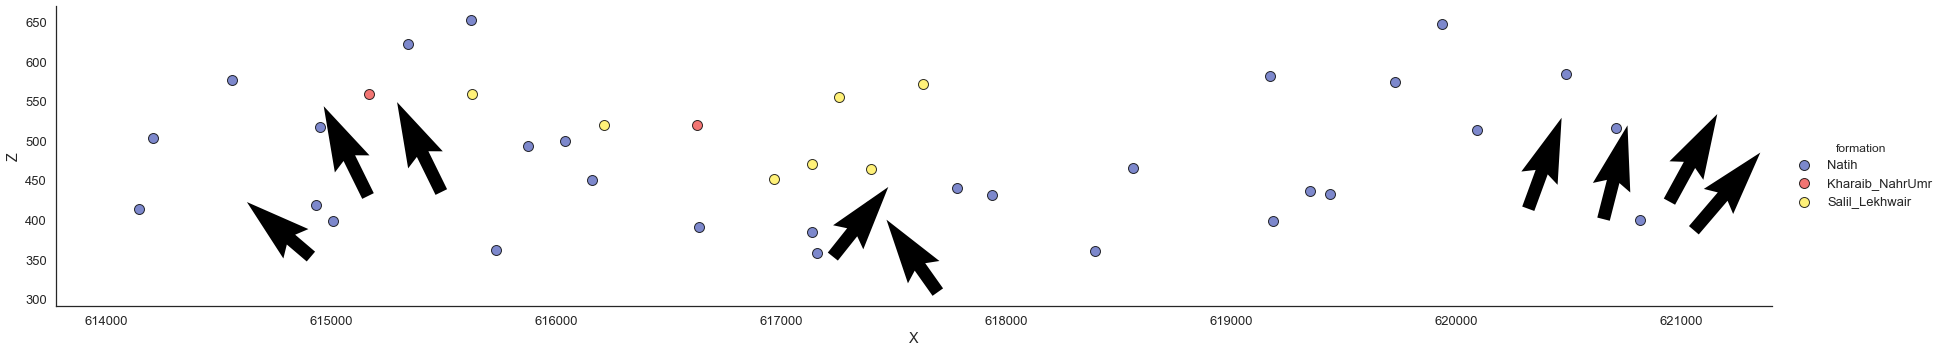

In [5]:
gp.plot_data(geo_data)

In [6]:
interp_data = gp.InterpolatorInput(geo_data, u_grade=[3,3])

Level of Optimization:  None
Device:  cpu
Precision:  float32


In [7]:
lith_block, fault_block = gp.compute_model(interp_data)

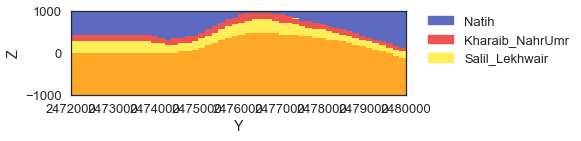

In [9]:
gp.plot_section(geo_data, lith_block[0], 25, direction='x')

## 3D Visualization

In [ ]:
v_l, s_l = gp.get_surfaces(interp_data, potential_lith=lith_block[1])
# gp.plot_surfaces_3D(geo_data, v_l, s_l, list(interp_data.get_formation_number())[:-1])

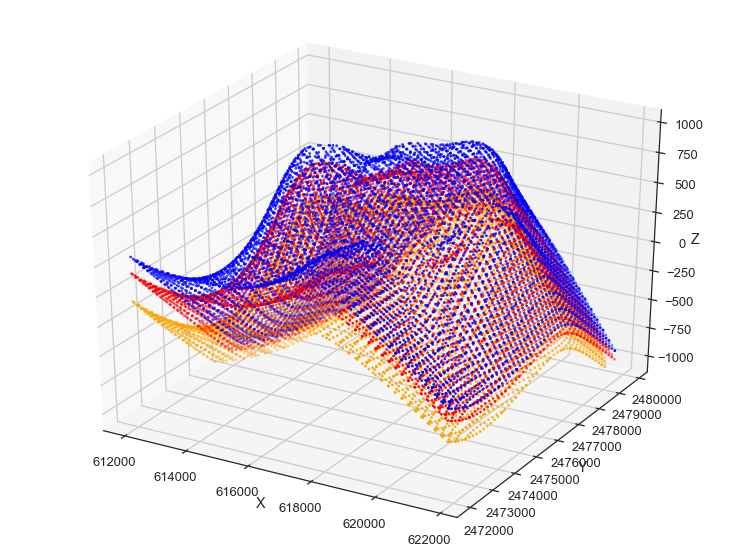

In [51]:
%matplotlib inline
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')

cs = ["blue", "red", "orange"]
for i in range(3):
    ax.scatter(v_l[i][:,0],v_l[i][:,1],v_l[i][:,2], c=cs[i], s=5)
    
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")